# Unet in Tensorflow

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow.compat'

## Load Data

In [40]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

train = 
test = dataset["test"]

OUTPUT_SIZE = (128, 128)
TRAIN_LENGTH = info.splits["train"].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

## Show Images

In [41]:
def display_images(images):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(image))
        plt.axis('off')
    plt.show()

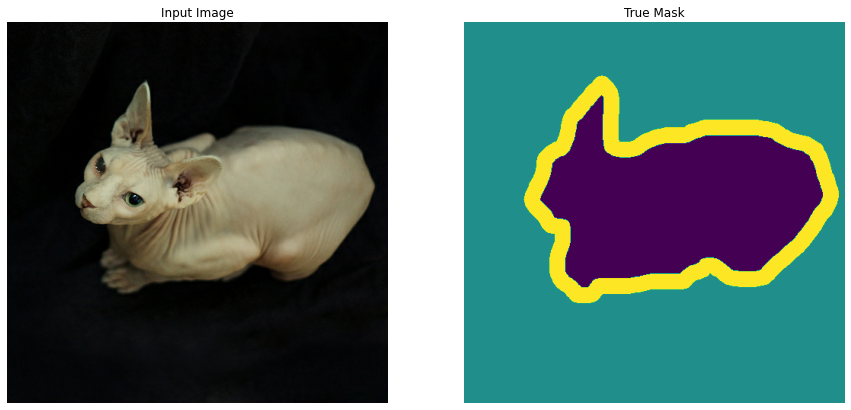

In [42]:
for t in train.take(1):
    display([t["image"], t["segmentation_mask"]])

## Preprocessing

In [43]:
def normalize_image(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [44]:
@tf.function
def preprocess_image_train(datapoint, output_size=OUTPUT_SIZE):
    """Preprocess single train image"""
    input_image = tf.image.resize(datapoint['image'], output_size)
    input_mask = tf.image.resize(datapoint['segmentation_mask'], output_size)

    # Data augmentation
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    # Normalize
    input_image, input_mask = normalize_image(input_image, input_mask)

    return input_image, input_mask

def preprocess_image_test(datapoint, output_size=OUTPUT_SIZE):
    """Preprocess single test image"""
    input_image = tf.image.resize(datapoint['image'], output_size)
    input_mask = tf.image.resize(datapoint['segmentation_mask'], output_size)

    # Normalize
    input_image, input_mask = normalize_image(input_image, input_mask)

    return input_image, input_mask

In [45]:
def preprocess_train_data(dataset, batch_size=BATCH_SIZE, buffer_size=BUFFER_SIZE):
    """Preprocess full train datatset"""
    train = dataset.map(preprocess_image_train, num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
    train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return train_dataset

def preprocess_test_data(dataset, batch_size=BATCH_SIZE):
    """Preprocess full test dataset"""
    test = dataset.map(preprocess_image_test)
    test_dataset = test.batch(BATCH_SIZE)

    return test_dataset


In [46]:
train_dataset = preprocess_train_data(train)
test_dataset = preprocess_test_data(test)


Error: KeyboardInterrupt